## In class Clustering Exercise continued

In [1]:
import numpy as np
import pylab as pl
import time
from IPython.display import display, clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(100)

In [3]:
random_1=np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

Text(0.5,1,'Random distribution of 2x100 matrix')

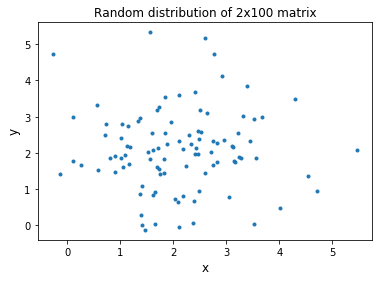

In [6]:
pl.plot(random_2[0], random_2[1],'.')
pl.xlabel('x', fontsize=12)
pl.ylabel('y', fontsize=12)
pl.title('Random distribution of 2x100 matrix')

##### Fig1: This figure gives us the random distribution of a 2x100 matrix

Text(0.5,1,'Random distribution of two 2x100 matrix, one with shifted mean')

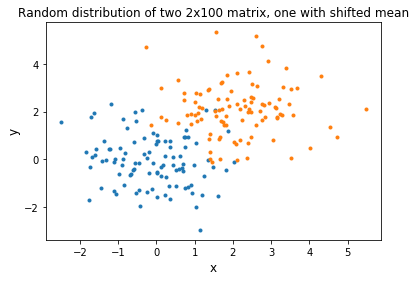

In [7]:
pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')
pl.xlabel('x', fontsize=12)
pl.ylabel('y', fontsize=12)
pl.title('Random distribution of two 2x100 matrix, one with shifted mean')

##### Fig2: This figure gives us the random distribution of two 2x100 matrix, one of them has shifted team so that they're distinguishable

In [8]:
clusters=2

In [9]:
random_stack = np.hstack([random_1, random_2])

In [10]:
min(random_stack[0]), max(random_stack[0])

centers = np.array([[0.,-1.], [0,-2]]) 

Text(0.5,1,'Random distribution of two 2x100 matrix, one with shifted mean')

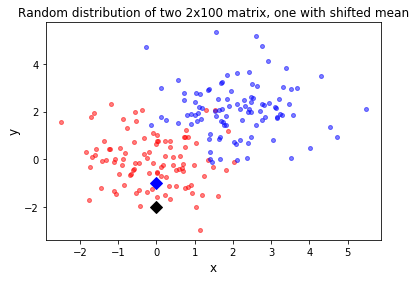

In [11]:
pl.plot(random_1[0], random_1[1],'r.', ms=8, alpha=0.5)
pl.plot(random_2[0], random_2[1],'b.', ms=8, alpha=0.5)
pl.plot(centers[0,0], centers[0,1],'bD', ms=8)
pl.plot(centers[1,0], centers[1,1],'kD', ms=8)
pl.xlabel('x', fontsize=12)
pl.ylabel('y', fontsize=12)
pl.title('Random distribution of two 2x100 matrix, one with shifted mean')

##### Fig3: This figure gives us the random distribution of two 2x100 matrix, one of them has shifted team so that they're distinguishable. Additionally, This plot also gives center for each cluster, the blue diamond belongs to blue cluster whereas the black cluster belongs to red cluster.

In [12]:
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [13]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

In [14]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
centers, newc

(array([[ 0., -1.],
        [ 0., -2.]]), array([[ 1.02749029,  1.12740236],
        [ 0.39753773, -1.87422208]]))

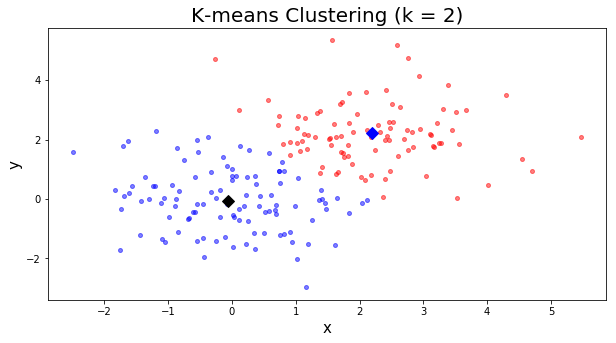

7
[[ 2.19922013  2.20466399]
 [-0.05913448 -0.05444283]] [[ 2.19922013  2.20466399]
 [-0.05913448 -0.05444283]]


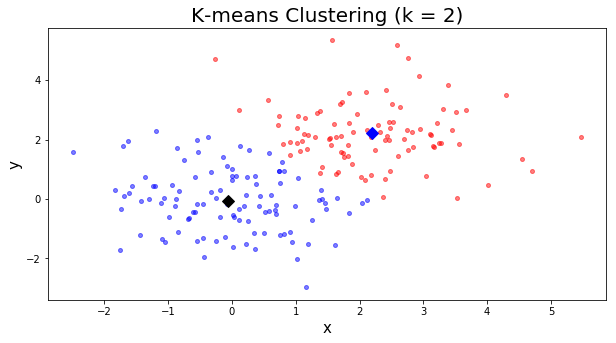

array([ 2.19922013,  2.20466399])

In [15]:
it = 0

fig, ax = plt.subplots(figsize=(10,5))

l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                      np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.', ms=8, alpha=0.5)
l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.', ms=8, alpha=0.5)
l3, = ax.plot(centers[0,0], centers[0,1], 'bD', ms=8)
l4, = ax.plot(centers[1,0], centers[1,1], 'kD', ms=8)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('K-means Clustering (k = 2)', fontsize=20)

display(fig)

while (not (centers == newc).all()) or it > 10:
    centers = newc
    
    l1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                  np.hstack([random_1[:, cl1], random_2[:, cl2]])[1])
    l2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1])
    l3.set_data(centers[0,0], centers[0,1])
    l4.set_data(centers[1,0], centers[1,1])
    
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
    
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                     np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print(it)
    print (centers, newc)
    it += 1

plt.show()
newc[0]

#### Fig 4: This plot gives a 'gif' of clustering each time the mean of the clusters change and then the clusters center shifts itself according to the new mean.

Points: 10

Total: 10